In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

$E = E_{int}$ + $E_{kin} \\$

$\frac{dE}{dt} = \frac{dE_{int}}{dt} + \frac{dE_{kin}}{dt} \\$

As the total energy is constant , $ \frac{dE}{dt} = 0$ , i.e. total energy in the system is fixed. 

$\\ E_{kin} = \frac{1}{2}Mv^2 \qquad E_{int} = TdS - pdV \quad\rightarrow\quad TdS = 0 \quad\rightarrow\quad E_{int} = pdV \\$

$\frac{d}{dt}\left(\frac{1}{2}Mv^2\right) = p\frac{dV}{dt} \\ $

For a photon gas, pressure is given by $P  = \frac{e}{3} = \frac{E}{3V} \qquad V = 4\pi R^2 \Delta R  = \alpha 4\pi R^3 \\$

$\Delta R$ is the thickness of the shell, $\alpha$ is the rate at which it develops.

$ \frac{dV}{dt} = 4\pi\alpha\left(3R^2\right)\frac{dR}{dt} = \frac{3V}{R}\frac{dR}{dt} = \frac{3V}{R}v \\$

Now we can substitute back into the original equation for energy:

$\frac{d}{dt}\left(\frac{1}{2}Mv^2\right) = p\frac{dV}{dt} \quad\rightarrow\quad \frac{1}{2}Mv \frac{dv}{dt} = \frac{3V}{R} \frac{E}{3V} = \frac{E}{R} \quad\rightarrow\quad \frac{dE_{int}}{dt} = \frac{E_{int}}{R}v \\$

Text(0, 0.5, 'Volume')

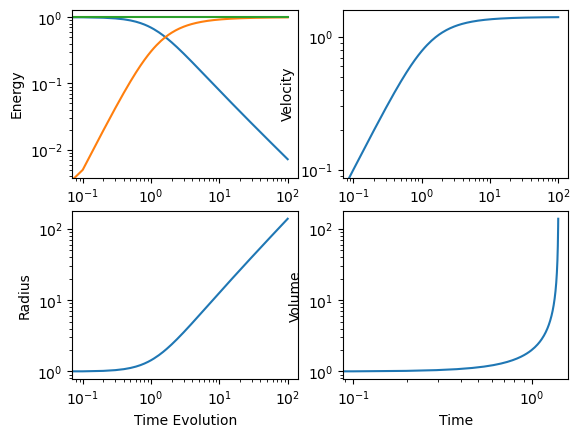

In [ ]:
# Simulating the mass layer moving at an arbitrary velocity v
c = 3e8
kv = 2e-2
t = np.linspace(0, 100, 1000)
M = 1
v0 = 0
Eint0 = 1
R0 = 1
y0 = [Eint0, R0, v0]

def energy(y, t):
    Eint= y[0]
    R = y[1]
    v = y[2]
    #Etot = Eint + 0.5 * M * v**2
    
    dEint = -(Eint / R) * v 
    dR = v
    dv = Eint / (M*R) 
    return[dEint, dR, dv]

Edep = odeint(energy, y0, t)
E = Edep[:, 0]
R = Edep[:, 1]
v = Edep[:, 2]
plt.figure()
plt.subplot(2,2,1)
plt.loglog(t, E, label='E')
plt.loglog(t,0.5*M*v**2)
plt.loglog(t, E + (0.5*M*v**2) )
plt.xlabel('Time Evolution')
plt.ylabel('Energy')
plt.subplot(2,2,2)
plt.loglog(t, v, label='v')
plt.xlabel('Time Evolution')
plt.ylabel('Velocity')
plt.subplot(2,2,3)
plt.loglog(t, R, label='R')
plt.xlabel('Time Evolution')
plt.ylabel('Radius')
plt.subplot(2,2,4)
plt.loglog(v, R, label='vR')
plt.xlabel('Time')
plt.ylabel('Volume')

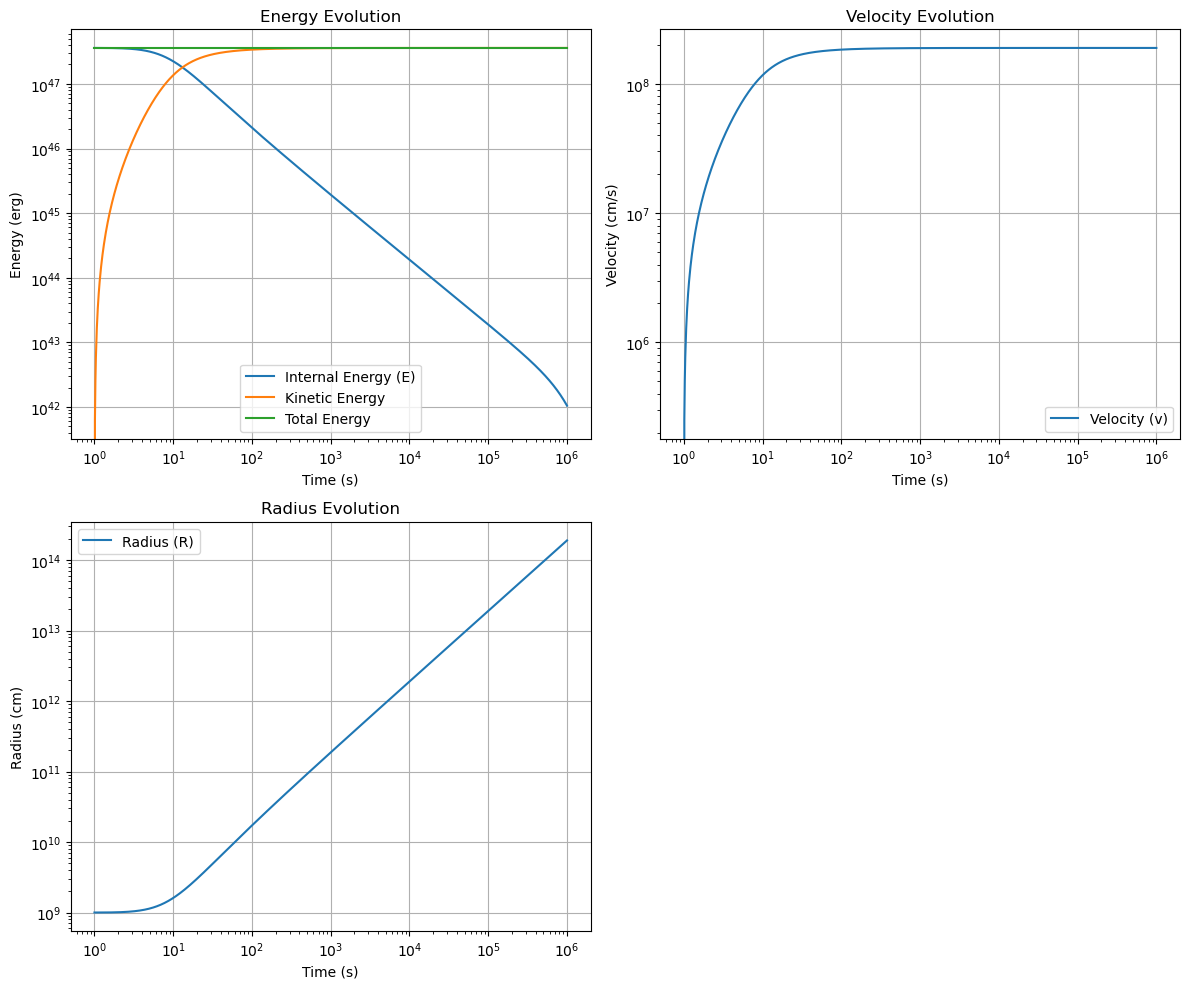

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
M_sun = 2e33     # Solar mass in grams
c = 3e10         # Speed of light in cm/s
v_min = 0.1*c    # Minimum velocity of massive shell in cm/s
a = 7.57e-15     # Radiation constant in CGS units
kv = [20, 5, 1]  # Opacity values relating to Red - Blue/Purple - Blue type kilonova

# Time array
t = np.logspace(0, 6, 1000)  # Time range from 10^0 to 10^6 seconds

# Initial conditions
M = 0.01 * M_sun                  # Mass of the layer in grams
v0 = 0                            # Initial velocity in cm/s
Eint0 = (2e-5)*M_sun*(v_min**2)            # Initial internal energy in ergs
R0 = 1e9                          # Initial radius in cm
y0 = [Eint0, R0, v0]              # Initial conditions array


# Luminosity function
def L_v(R, Eint):
    t_diff = (3* kv[2] * M) / (4 * np.pi * c * R)
    t_lc = (R / c)
    return Eint / (t_diff + t_lc)

# Energy evolution function for odeint
def energy(y, t):
    Eint = y[0]
    R = y[1]
    v = y[2]
    
    dEint = -((Eint / R) * v) - L_v(R, Eint)
    dR = v
    dv = Eint / (M * R)
    
    return [dEint, dR, dv]

# Solve the ODEs
Edep = odeint(energy, y0, t)
E = Edep[:, 0]
R = Edep[:, 1]
v = Edep[:, 2]

# Plotting results
plt.figure(figsize=(12, 10))

# Energy plot
plt.subplot(2, 2, 1)
plt.loglog(t, E, label='Internal Energy (E)')
plt.loglog(t, 0.5 * M * v**2, label='Kinetic Energy')
plt.loglog(t, E + (0.5 * M * v**2), label='Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (erg)')
plt.legend()
plt.title('Energy Evolution')
plt.grid(True)

# Velocity plot
plt.subplot(2, 2, 2)
plt.loglog(t, v, label='Velocity (v)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.legend()
plt.title('Velocity Evolution')
plt.grid(True)

# Radius plot
plt.subplot(2, 2, 3)
plt.loglog(t, R, label='Radius (R)')
plt.xlabel('Time (s)')
plt.ylabel('Radius (cm)')
plt.legend()
plt.title('Radius Evolution')
plt.grid(True)

plt.tight_layout()
plt.show()

For the system, the associated internal energy can be thought to be a small fraction of the kinetic energy as the majority is held up in random movement of the particles
$\\ E_{int} = \eta E_{kin} \qquad where \quad \eta \approx 10^{-3} \quad or\: otherwise \\$
To find the luminosity, we need to sample a discrete range of shells, in a range of $v_0$ to c. Using a logspace allows us to sample more at the lower speeds, where more of the mass is contained. The mass is distributed according to homologous expansion, where the mass at speed greater than v, $M_{>v}$ is given by: 
$\\ M_{>v} = M(\frac{v}{v_0})^{-\beta} \qquad where\quad \beta = 3 \\ $
This formula can be considered to be the integral of shell mass over time; i.e. the sum of shells of mass M travelling at a speed v:
$\\ M_{>v} = \int_{v}^{c} M_v dv = M(\frac{v}{v_0})^{-\beta} \qquad\rightarrow\qquad M_v (v) = \frac{d}{dv}\left(M(\frac{v}{v_0})^{-\beta}\right) = -\beta M v_0^{\beta}v^{-\beta - 1} \quad\rightarrow\quad -3 M v_0^{3}v^{-4} \\$
In order to equate this to kinetic energy, both sides can be multiplied by $0.5 v^2$.
$\\ \frac{1}{2} M_v v^2 = E_{kin} = \frac{3}{2} M v_0^3 v^{-2}$


   Velocity (cm/s)      Mass (g)  Internal Energy (erg)
0     6.000000e+09  1.265618e+31           7.620435e+46
1     9.000000e+09  3.749979e+30           1.003514e+46
2     1.200000e+10  1.582022e+30           2.381386e+45
3     1.500000e+10  8.099954e+29           7.803326e+44
4     1.800000e+10  4.687473e+29           3.135982e+44
5     2.100000e+10  2.951878e+29           1.450907e+44
6     2.400000e+10  1.977528e+29           7.441831e+43
7     2.700000e+10  1.388881e+29           4.129688e+43
8     3.000000e+10  1.012494e+29           2.438539e+43


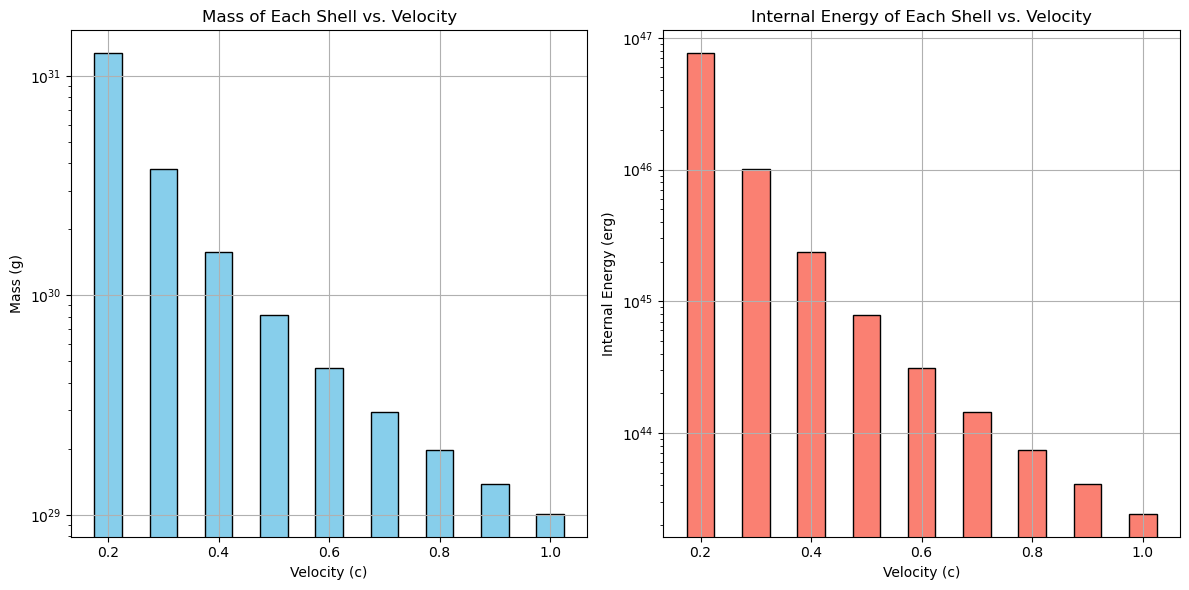

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
M_sun = 2e33             # Solar mass in grams
c = 3e10                 # Speed of light in cm/s
v_min = 0.1 * c          # Minimum velocity of massive shell in cm/s
eta = 1e-3               # Scale correction for internal energy
M_ejecta = 0.01 * M_sun  # Total mass of the ejecta
beta = 3                 # factor for homologous expansion - ensures shells never overlap 
Ekin = (1/2) * M_ejecta * (v_min**2)

# Velocity array for each shell
v_shells = np.linspace(0.1, 1, 10)[1:] * c

# Mass distribution
mass_fraction = (v_shells / v_min) ** -beta    # Mass fraction based on velocity
mass_fraction /= np.sum(mass_fraction)         # Normalize to ensure total mass sums to M_total
M_shells = mass_fraction * M_ejecta            # Calculate mass for each shell

# Internal energy for each shell
energy_fraction =  eta * (3/2) * M_shells * (v_min**3) * (v_shells**-2) 
energy_fraction /= np.sum(energy_fraction)
E_int_shells = energy_fraction * (eta * Ekin)

# Dataframe of properties
shell_data = pd.DataFrame({'Velocity (cm/s)': v_shells, 'Mass (g)': M_shells, 'Internal Energy (erg)': E_int_shells})

print(shell_data)

# Plotting the shell properties
plt.figure(figsize=(12, 6))

# Velocity vs. Mass plot
plt.subplot(1, 2, 1)
plt.bar(shell_data['Velocity (cm/s)'] / c, shell_data['Mass (g)'], width=0.05, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Velocity (c)')
plt.ylabel('Mass (g)')
plt.title('Mass of Each Shell vs. Velocity')
plt.grid(True)

# Velocity vs. Internal Energy plot
plt.subplot(1, 2, 2)
plt.bar(shell_data['Velocity (cm/s)'] / c, shell_data['Internal Energy (erg)'], width=0.05, color='salmon', edgecolor='black')
plt.yscale("log")
plt.xlabel('Velocity (c)')
plt.ylabel('Internal Energy (erg)')
plt.title('Internal Energy of Each Shell vs. Velocity')
plt.grid(True)

plt.tight_layout()
plt.show()

Now with a mass shell interpretation, we can find a value for the luminosity of each shell, defined by $L_v$ earlier in the code, and a total luminosity, given by:
$\\ L_{tot} \quad=\quad \int_{v_0} L_v \frac{dM_v}{dv}dv \quad\approx\quad \sum_v (L_v \delta M_v)$

C:\Users\olibr\AppData\Local\Temp\ipykernel_12988\4098582809.py:88: RuntimeWarning: invalid value encountered in log10
  magnitude = -2.5 * np.log10(lv_values / (4*np.pi*(3.086e+18)**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


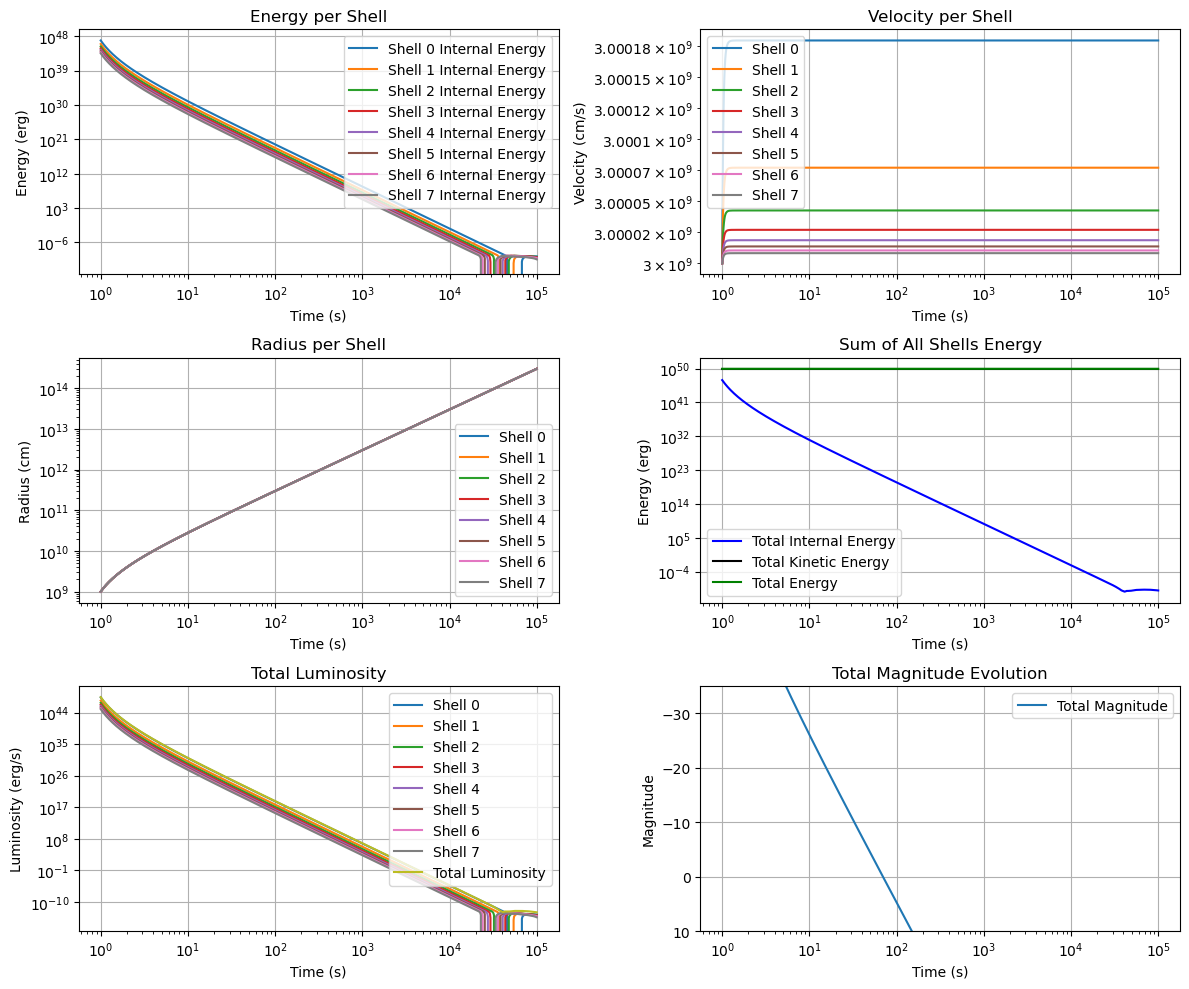

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

M_sun = 2e33
M = 0.01 * M_sun   
c = 3e10        
v_min = 0.1 * c  
kv = [20, 5, 1] 
t = np.logspace(0, 5, 1000)  
beta = 3         
num_shells = 8
n= 10e-6
a = 7.57e-15

def L_v(R, Eint, M_v, t):
    t_diff = ((M_v)*(4/3) * kv[2]) / (4 * np.pi * M*(1/3) * v_min * t * c)
    t_lc = (R / c)
    return Eint / (t_diff + t_lc)

def energy(y, t, M):
    Eint, R, v = y
    dEint = -((Eint / R) * v) - L_v(R, Eint, M,t)
    dR = v
    dv = Eint / (M * R)
    return [dEint, dR, dv]


E_all = []
R_all = []
v_all = []

for i, row in shell_data.iterrows():
    M = row['Mass (g)']
    Eint0 = row['Internal Energy (erg)']
    v0 = 0.1*c
    R0 = 1e9
    y0 = [Eint0, R0, v0]

   
    Edep = odeint(energy, y0, t, args=(M,))
    E_all.append(Edep[:, 0])  
    R_all.append(Edep[:, 1])  
    v_all.append(Edep[:, 2]) 


plt.figure(figsize=(12, 10))


plt.subplot(3, 2, 1)
for i, E in enumerate(E_all):
    plt.loglog(t, E, label=f'Shell {i} Internal Energy')
   # plt.loglog(t, 0.5 * shell_data['Mass (g)'][i] * np.array(v_all[i])**2, label=f'Shell {i} Kinetic Energy')
    #plt.loglog(t, E + (0.5 * shell_data['Mass (g)'][i] * np.array(v_all[i])**2), label=f'Shell {i} Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (erg)')
plt.legend()
plt.title('Energy per Shell')
plt.grid(True)


plt.subplot(3, 2, 2)
for i, v in enumerate(v_all):
    plt.loglog(t, v, label=f'Shell {i}')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.legend()
plt.title('Velocity per Shell')
plt.grid(True)

plt.subplot(3, 2, 5)
for i, (R, Eint) in enumerate(zip(R_all, E_all)):
    lv_values = L_v(R, Eint, shell_data['Mass (g)'][i], t)
    plt.loglog(t, lv_values, label=f'Shell {i}')
plt.xlabel('Time (s)')
plt.ylabel('Luminosity (erg/s)')
plt.legend()
plt.title('Luminosity per Shell')
plt.grid(True)
distance = 10 * 3.086e+18  
zero_point_flux = 3.63e-20

plt.subplot(3, 2, 6)
for i, (R, Eint) in enumerate(zip(R_all, E_all)):
    lv_values = L_v(R, Eint, shell_data['Mass (g)'][i], t)
    magnitude = -2.5 * np.log10(lv_values / (4*np.pi*(3.086e+18)**2))
    
plt.xscale('log')
plt.xlabel('Time (s)')
plt.gca().invert_yaxis()
plt.ylabel('Magnitude')
plt.legend()
plt.title('Magnitude per Shell')
plt.grid(True)

plt.subplot(3, 2, 5)
L_tot = np.sum([L_v(R, Eint, shell_data['Mass (g)'][i], t) for i, (R, Eint) in enumerate(zip(R_all, E_all))], axis=0)
flux = L_tot / (4 * np.pi * distance**2)
plt.loglog(t, L_tot, label='Total Luminosity')
plt.xlabel('Time (s)')
plt.ylabel('Luminosity (erg/s)')
plt.legend()
plt.title('Total Luminosity')
plt.grid(True)


plt.subplot(3, 2, 6)
total_magnitude = -2.5 * np.log10(flux / zero_point_flux)

plt.plot(t, total_magnitude, label='Total Magnitude')
plt.xscale('log')
plt.xlabel('Time (s)')
plt.ylim(10, -35)
plt.ylabel('Magnitude')
plt.legend()
plt.title('Total Magnitude Evolution')
plt.grid(True)

plt.subplot(3, 2, 3)
for i, R in enumerate(R_all):
    plt.loglog(t, R, label=f'Shell {i}')
plt.xlabel('Time (s)')
plt.ylabel('Radius (cm)')
plt.legend()
plt.title('Radius per Shell')
plt.grid(True)

E_sum = np.sum(E_all, axis=0)
K_sum = np.sum([0.5 * shell_data['Mass (g)'][i] * np.array(v_all[i])**2 for i in range(num_shells)], axis=0)
T_sum = E_sum + K_sum

plt.subplot(3, 2, 4)
plt.loglog(t, E_sum, label='Total Internal Energy', color='blue')
plt.loglog(t, K_sum, label='Total Kinetic Energy', color='black')
plt.loglog(t, T_sum, label='Total Energy', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Energy (erg)')
plt.legend()
plt.title('Sum of All Shells Energy')
plt.grid(True)
plt.tight_layout()
plt.show()

Now we wish to find the flux over the entire photosphere of the kilonova, which is given by the equation:
$\\ F_{\nu}(t) = \frac{2\pi h \nu^3}{c^2} \frac{1}{\exp{\left[h\nu / k_BT_{eff}(t)\right]} - 1}\frac{R^2_{ph}}{D^2} \\$
Where $R_{ph}$ is the radius of the photosphere, a condition satisfied when the optical depth $\tau_{\nu} = 1$. The effective temperature is also given as:
$\\ \tau_{\nu} = \int_{v_0} \frac{dM_v}{dv}\frac{\kappa_v}{4\pi R_{v}^2}dv \approx \sum_v \left(\frac{\kappa_v\delta M_v}{4\pi R_v^2}\right) = 1  \quad\rightarrow\quad R_{ph} = \sqrt{\frac{\kappa_v \delta M}{4\pi}} \qquad\qquad T_{eff} = \left(\frac{L_{tot}}{4\pi\sigma R^2_{ph}}\right)^{\frac{1}{4}} \\ $

In [ ]:
sigma = 5.67e-8    # Stefan's constant
h = 6.63e-34       # Planck's constant
nu = 6e-8          # Frequency - can be altered to see fluxes of different frequencies
kB = 1.38e-23      # Boltzmann's constant

R_ph = np.sqrt((kv*M) / (4*np.pi))
T_eff = (L_tot / (4*np.pi*sigma*r_ph))**(1/4)
Flux = ((2*np.pi*h*(nu**3))/(c**2))*(1/(np.exp((h*nu)/(kB*T_eff))-1))*(R_ph^2 / D^2)